In [1]:
import pandas as pd
import csv

import subprocess
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Loading a 'practice' file

In [2]:
FILEPATH = "../files/Object_Hit_-_[Child_-_practice]_-_RIGHT_-_12_02.csv"
# The first rows don't include tracking data -> skiprows
results = pd.read_csv(FILEPATH,encoding= 'unicode_escape', sep=',',skiprows = 390, parse_dates=[0,1,2])
# Sorted by Frame number
# for i in results[results['Event name'].notna()].iterrows():
#     print(i[0])
results

,Trial #,TP Row,Block Row,Sample duration (s),Sample count,Event name,Event time (s),Video frame sent,Video frame ACKed,Frame #,...,Left: Shoulder angle,Left: Elbow angle,Left: Shoulder velocity,Left: Elbow velocity,Left: Shoulder acceleration,Left: Elbow acceleration,Left: Cmd shoulder torque,Left: Cmd elbow torque,Video frame interval time,Video frame drop count
0,1,1,1,0.005,3347.0,Continue Task,0.0,NaN,NaN,0,...,0.479841,1.396012,0.009587,-0.009587,9.587379,-19.174759,0.0,0.0,9.000000,0
1,NaN,NaN,NaN,NaN,NaN,Gaze blink start,0.0,Video Frame 0,NaN,1,...,0.479869,1.396003,0.009587,-0.009587,9.587379,-19.174759,0.0,0.0,9.000000,0
2,NaN,NaN,NaN,NaN,NaN,Gaze saccade start,0.0,NaN,NaN,2,...,0.479898,1.395993,0.009587,-0.009587,9.587379,-9.587379,0.0,0.0,9.000000,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 1,NaN,3,...,0.479927,1.395993,0.009587,0.000000,9.587379,0.000000,0.0,0.0,9.000000,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2,NaN,4,...,0.479956,1.395983,0.009587,0.000000,9.587379,0.000000,0.0,0.0,9.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2000,3342,...,0.812954,1.162636,-0.191748,0.431432,9.587379,-9.587379,0.0,0.0,7.999420,0
3343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2001,3343,...,0.811976,1.164774,-0.201335,0.431432,-9.587379,9.587379,0.0,0.0,7.999420,0
3344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3344,...,0.811008,1.166874,-0.191748,0.412257,0.000000,-9.587379,0.0,0.0,7.999420,0
3345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Video Frame 2002,3345,...,0.810020,1.168954,-0.201335,0.412257,-9.587379,0.000000,0.0,0.0,9.000778,0


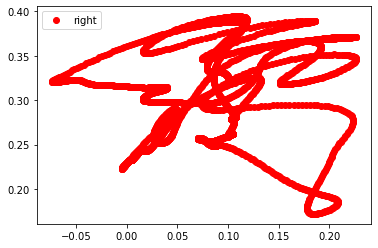

In [3]:
from csv_load import Trial, Kinematics

trial1 = Trial(results)


In [4]:
#[i for i in results.columns]

In [5]:
# cols = results.columns
# for i in cols: print(i)

### First plots

In [6]:
gazeX = results['Gaze_X']
gazeY = results['Gaze_Y']

Text(0.5, 1.0, 'Eye positions history')

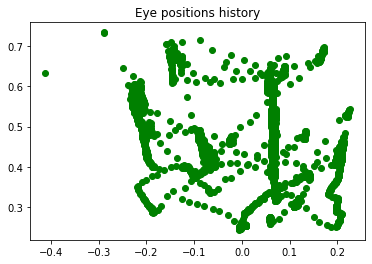

In [7]:
fig = plt.figure()
plt.plot(gazeX,gazeY,'go')
plt.title("Eye positions history")
#plt.savefig('eye_position.svg')
#plt.show()

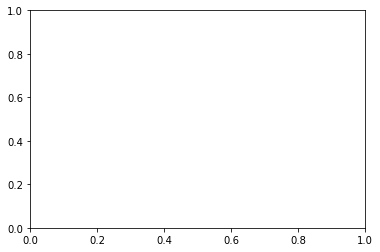

In [8]:
# Plot don't show up on ipynb but works within a script
# Check 'eye_animation.py'
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

x,y = [], []
fig, ax = plt.subplots()
def animate(i):
    x.append(gazeX[i])
    y.append(gazeY[i])
    print(x)

    ax.clear()
    ax.plot(x, y, 'ro')
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([0,1])

ani = FuncAnimation(fig, animate, frames=len(gazeX), interval=5, repeat=False)
plt.show()
plt.close()

### Plot of eyes combined with both hands positions

In [9]:
# Time interval between frames: 5ms
print('Total time of the practice (s):', results['Frame time (s)'].iloc[-1])
#results['Frame time (s)'].iloc[-1] / 0.005

Total time of the practice (s): 16.7299995


In [10]:
time = results['Frame time (s)']
gazeX = results['Gaze_X']
gazeY = results['Gaze_Y']

# Right: Hand speed
rightX = results['Right: Hand position X']
rightY = results['Right: Hand position Y']
rightSpeed = results['Right: Hand speed']
# Left hand
leftX = results['Left: Hand position X']
leftY = results['Left: Hand position Y']
leftSpeed = results['Left: Hand speed']
    

In [11]:
round(time[200],4)%1

0.0

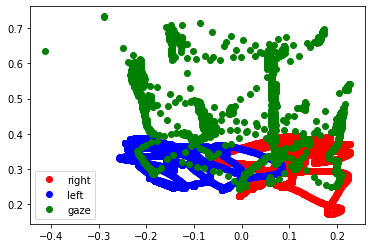

In [12]:
fig = plt.figure()

plt.plot(rightX,rightY,'ro', label='right')
plt.plot(leftX,leftY,'bo', label='left')
plt.plot(gazeX,gazeY,'go', label='gaze')

plt.legend()
plt.show()
#plt.savefig('all_position.svg')

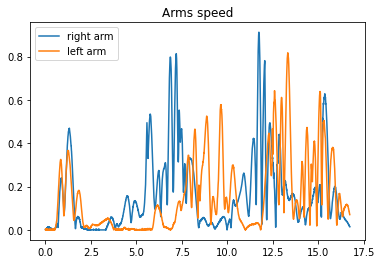

In [13]:
plt.plot(time, rightSpeed, label='right arm')
plt.plot(time, leftSpeed, label='left arm')
plt.title('Arms speed')
plt.legend()
#plt.savefig('arms_speed.svg')

## Events

In [14]:
# Relevant columns: 
# Event name
# Event time (s)

# 101 rows register an event
len(results[results['Event name'].notna()])

101

(array([3., 0., 0., ..., 0., 0., 0.]),
 array([0.00000000e+00, 4.99999989e-03, 9.99999978e-03, ...,
        1.67199993e+01, 1.67250004e+01, 1.67299995e+01]),
 [<matplotlib.patches.Polygon at 0x7fbfb8e2e430>])

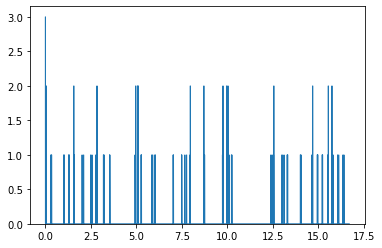

In [15]:
res_events = results[results['Event name'].notna()]
event_times = res_events['Event time (s)']
plt.hist(event_times, results['Frame time (s)'], histtype='step')

## Trials identification and separation

Normal files contain several Trials, the first goal here is to automatically read the csv's of an experience and extract the events separately.

In [16]:
# practice example is from ball_on_bar exercise
practice_ball = "../files/utf8/Ball_on_Bar_-_[Child_-_practice_2_(30s_per_level)]_-_RIGHT_-_11_57.csv"
practice_object = "../files/utf8/Object_Hit_-_[Child_-_practice]_-_RIGHT_-_12_02.csv"
practice_reach = "../files/utf8/Visually_Guided_Reaching_-_[Child_v2_-_practice]_-_LEFT_-_11_49.csv"
practice_reach2 = "../files/utf8/Visually_Guided_Reaching_-_[Child_v2_-_practice]_-_RIGHT_-_11_47.csv"

ball = "../files/utf8/Ball_on_Bar_-_Child_-_RIGHT_-_11_59.csv"
object_hit = "../files/utf8/Object_Hit_-_Child_-_RIGHT_-_12_02.csv"

circuit = "../files/utf8/Circuit_Exo_-_[b_Circuit1_(youngerchildren)]_-_RIGHT_-_12_09.csv"
circuit2 = "../files/utf8/Circuit_Exo_-_[c_Circuit1_rotated_(youngerchildren)]_-_RIGHT_-_12_11.csv"
circuit3 = "../files/utf8/Circuit_Exo_-_[Circuit2exo_ExTrialLisaD(youngerchildren)]_-_RIGHT_-_12_05.csv"

reaching = "../files/utf8/Visually_Guided_Reaching_-_Child_v2_(4_target)_-_LEFT_-_11_50.csv"


#object:     390       -3
#ball :      360       -6
#circuit :   328       -
#reaching:   336       -3



Line space problem, examples:

In [17]:
#FILEPATH = practice_object
#FILEPATH = practice_ball
#FILEPATH = object_hit
FILEPATH = circuit2
# The first rows don't include tracking data -> skiprows
results = pd.read_csv(FILEPATH,encoding= 'unicode_escape', sep=',',skiprows = 328, parse_dates=[0,1,2])
# Sorted by Frame number
results.head()

,Trial #,TP Row,Block Row,Sample duration (s),Sample count,Event name,Event time (s),Video frame sent,Video frame ACKed,Frame #,...,Left: Shoulder angle,Left: Elbow angle,Left: Shoulder velocity,Left: Elbow velocity,Left: Shoulder acceleration,Left: Elbow acceleration,Left: Cmd shoulder torque,Left: Cmd elbow torque,Video frame interval time,Video frame drop count
0,1,1,1,0.001,62905.0,TASK_BUTTON_15_CLICKED,0.0,NaN,NaN,0,...,0.203705,1.547694,-0.220510,-0.143811,-9.587379e+00,9.587379,0.0,0.0,7.999999,0
1,NaN,NaN,NaN,NaN,NaN,Gaze saccade start,0.0,Video Frame 0,NaN,1,...,0.203484,1.547560,-0.220510,-0.134223,-1.776357e-09,9.587379,0.0,0.0,7.999999,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0.203273,1.547406,-0.210922,-0.153398,9.587379e+00,-19.174759,0.0,0.0,7.999999,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,0.203053,1.547272,-0.220510,-0.134223,-9.587379e+00,19.174759,0.0,0.0,7.999999,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,0.202842,1.547138,-0.210922,-0.134223,9.587379e+00,0.000000,0.0,0.0,7.999999,0


Skipping the lines from a given 

In [18]:
ball[14]

'B'

In [19]:
ENCODE = 'utf_8'
def extract_dataframes(file, offset=0):
    """ TODO
    """
    # Line detection
    trials = []
    with open(file, encoding=ENCODE) as infile:
        for cnt, line in enumerate(infile):
            if "Trial #" in line:
                #print("Line {}".format(cnt))
                trials.append(cnt)

        #print("Line end :", cnt)
        trials.append(cnt)
        #process = subprocess.Popen(["wc", "-l", EXERCISE])#, "copy.sh"])
    # Dataframes
    dfs = []
    for i, j in enumerate(trials[:-1]):
        dfs.append(pd.read_csv(file,encoding= 'utf8', sep=',', low_memory=False,
                                skiprows = j-offset, nrows=trials[i+1]-trials[i]))

    return dfs

In [20]:
# import glob 
# for file in glob.glob("../files/utf8/*.csv"):

In [21]:
def plots(dataframe):
    fig = plt.figure()
    plt.plot(dataframe['Right: Hand position X'].astype(float),dataframe['Right: Hand position Y'].astype(float),'ro', label='right')
    plt.plot(dataframe['Left: Hand position X'],dataframe['Left: Hand position Y'],'bo', label='left')
    plt.plot(dataframe['Gaze_X'],dataframe['Gaze_Y'],'go', label='gaze')
    plt.legend()
    plt.show()
    #return fig

In [22]:
EXERCISE = practice_ball

if EXERCISE[14] == 'B':
    dfs = extract_dataframes(EXERCISE, offset=6)
elif EXERCISE[14] == 'C':
    dfs = extract_dataframes(EXERCISE, offset=0)
elif EXERCISE[14] == 'O' or 'R' :
    dfs = extract_dataframes(EXERCISE, offset=3)


In [23]:
results.iloc[0][:10]

Trial #                                     1
TP Row                                      1
Block Row                                   1
Sample duration (s)                     0.001
Sample count                          62905.0
Event name             TASK_BUTTON_15_CLICKED
Event time (s)                            0.0
Video frame sent                          NaN
Video frame ACKed                         NaN
Frame #                                     0
Name: 0, dtype: object

In [24]:
trial1 = Trial(dfs[0])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbfb8da40d0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
dfs[0]['Right: Hand position Y']

0                2.58949280e-01
1                2.58950323e-01
2                2.58947909e-01
3                2.58947909e-01
4                2.58947909e-01
                  ...          
65540                       NaN
65541                       NaN
65542    Right: Hand position Y
65543            3.15320671e-01
65544            3.15455735e-01
Name: Right: Hand position Y, Length: 65545, dtype: object

In [ ]:
#plots(dfs[0])

In [ ]:
for i in dfs:
    print(i.columns[:4])
dfs[0].head()

Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')
Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')
Index(['Trial #', 'TP Row', 'Block Row', 'Sample duration (s)'], dtype='object')


,Trial #,TP Row,Block Row,Sample duration (s),Sample count,Event name,Event time (s),Video frame sent,Video frame ACKed,Frame #,...,Left: Shoulder angle,Left: Elbow angle,Left: Shoulder velocity,Left: Elbow velocity,Left: Shoulder acceleration,Left: Elbow acceleration,Left: Cmd shoulder torque,Left: Cmd elbow torque,Video frame interval time,Video frame drop count
0,1,1,1,1.00000000e-03,65528,NaN,NaN,NaN,NaN,0,...,8.84638937e-01,1.44797575e+00,0,0,9.58737946e+00,-9.58737945e+00,0,0,5.00000268e+00,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,8.84629401e-01,1.44798529e+00,-9.58738010e-03,9.58738010e-03,-9.58737946e+00,9.58737946e+00,0,0,5.00000268e+00,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,8.84619625e-01,1.44799507e+00,-9.58738010e-03,9.58738010e-03,8.88178420e-10,0,0,0,5.00000268e+00,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,8.84619625e-01,1.44799507e+00,0,0,9.58737946e+00,-9.58737946e+00,0,0,5.00000268e+00,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,8.84610089e-01,1.44799501e+00,-9.58738010e-03,0,-9.58737946e+00,0,0,0,5.00000268e+00,0


In [ ]:
# import subprocess
# import re
# process = subprocess.Popen(["bash", "count_event.sh"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
# result = process.communicate()
# lines = re.split(r"[\n]",result[0])
# lines[3] = 0
# for i, row in enumerate(lines):
#     lines[i] = int(row)
# lines